# CST 2130 Coursework 2

### Middlesex University Dubai
### Professor: Jaspreet Singh Sethi
### Date: 23/2/2024
### Student 1: Aman Mishra - M00983641
### Student 2: Vishesh Mundra - M00909866
### Student 3: Amay Waykool - M00912688
### Student 4: Arfa Kazi - M00909115

## Introduction

This coursework involves using the *London Bike Data* dataset from the *Transport for London (TfL)* and *freemeteo.co.uk* collaboration to create prediction models for *Santander Cycles (formerly Barclays Cycle Hires)*. This model will predict the bike sharing usage in each day and in each hour of the day. The recent success of the *Santander Cycles* scheme has led to increased demands and expansion in different areas of London. To aid with this growth an accurate predictor model is required.

To achieve the best results we will use **K-fold Cross-Validation** to get training and testing datasets and then run **Logistic Regression** and **Decision Tree** evaluation metrics to measure prediction accuracy and return the best results among the two.

## Code

### Initial Library Imports

In [1]:
## Import necessary packages for creating prediction models and tabulations
## Following imports are only for logistic regression and k-fold cross-validation packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Import and Modification

In [3]:
df = pd.read_csv("London_bike_data.csv")

# We will change the "bike_rented" field from alphabetic category to numeric

df['bike_rented'].replace(['very low', 'low', 'medium', 'high', 'very high'], [0,1,2,3,4], inplace=True)

### Viewing dataset after modification

In [4]:
df.head()

,id,date,hour,season,is_weekend,is_holiday,temperature,temperature_feels,humidity,wind_speed,weather_code,bike_rented
0,8650,2016-01-01,6,3,0,1,3.0,0.0,87.0,10.0,1,0
1,9383,2016-01-31,19,3,1,0,14.0,14.0,77.0,35.0,3,1
2,12036,2016-05-22,8,0,1,0,14.5,14.5,65.0,6.5,1,1
3,2404,2015-04-14,11,0,0,0,18.0,18.0,54.0,21.5,1,2
4,7406,2015-11-09,21,2,0,0,15.0,15.0,82.0,31.5,4,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13060 entries, 0 to 13059
Data columns (total 12 columns):
id                   13060 non-null int64
date                 13060 non-null object
hour                 13060 non-null int64
season               13060 non-null int64
is_weekend           13060 non-null int64
is_holiday           13060 non-null int64
temperature          13060 non-null float64
temperature_feels    13060 non-null float64
humidity             13060 non-null float64
wind_speed           13060 non-null float64
weather_code         13060 non-null int64
bike_rented          13060 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [6]:
df.describe()

,id,hour,season,is_weekend,is_holiday,temperature,temperature_feels,humidity,wind_speed,weather_code,bike_rented
count,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000,13060.000000
mean,8699.206891,11.497320,1.488974,0.285835,0.021822,12.460784,11.512506,72.403407,15.885094,2.716309,1.992649
std,5008.757529,6.920567,1.118707,0.451828,0.146109,5.573487,6.618541,14.264575,7.883711,2.348494,1.414952
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000
25%,4365.500000,6.000000,0.000000,0.000000,0.000000,8.000000,6.000000,63.000000,10.000000,1.000000,1.000000
50%,8697.500000,12.000000,1.000000,0.000000,0.000000,12.500000,12.500000,75.000000,15.000000,2.000000,2.000000
75%,13038.250000,18.000000,2.000000,1.000000,0.000000,16.000000,16.000000,83.000000,20.500000,3.000000,3.000000
max,17414.000000,23.000000,3.000000,1.000000,1.000000,34.000000,34.000000,100.000000,56.500000,26.000000,4.000000


### Exploratory Analysis

Checking out the distribution of *"hour"* when the bikes were rented in a 24 hr cycle.

<module 'matplotlib.pyplot' from 'C:\\Users\\amanr\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

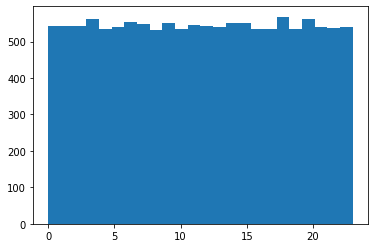

In [15]:
plt.hist(df['hour'], bins=24)
plt

Checking out the relationship between *hour* and *bike_rented*.

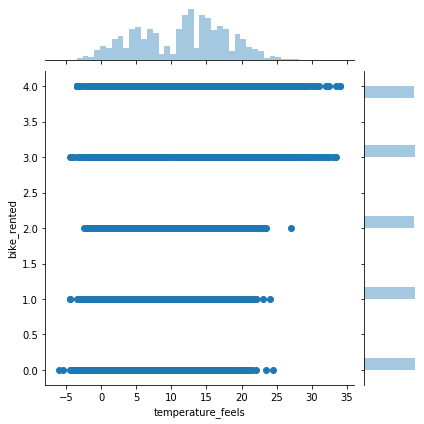

In [20]:
sns.jointplot('temperature_feels', 'bike_rented', df)

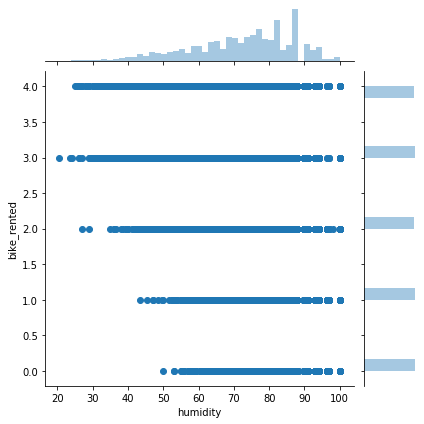

In [21]:
sns.jointplot('humidity', 'bike_rented', df)

C:\Users\amanr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\amanr\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


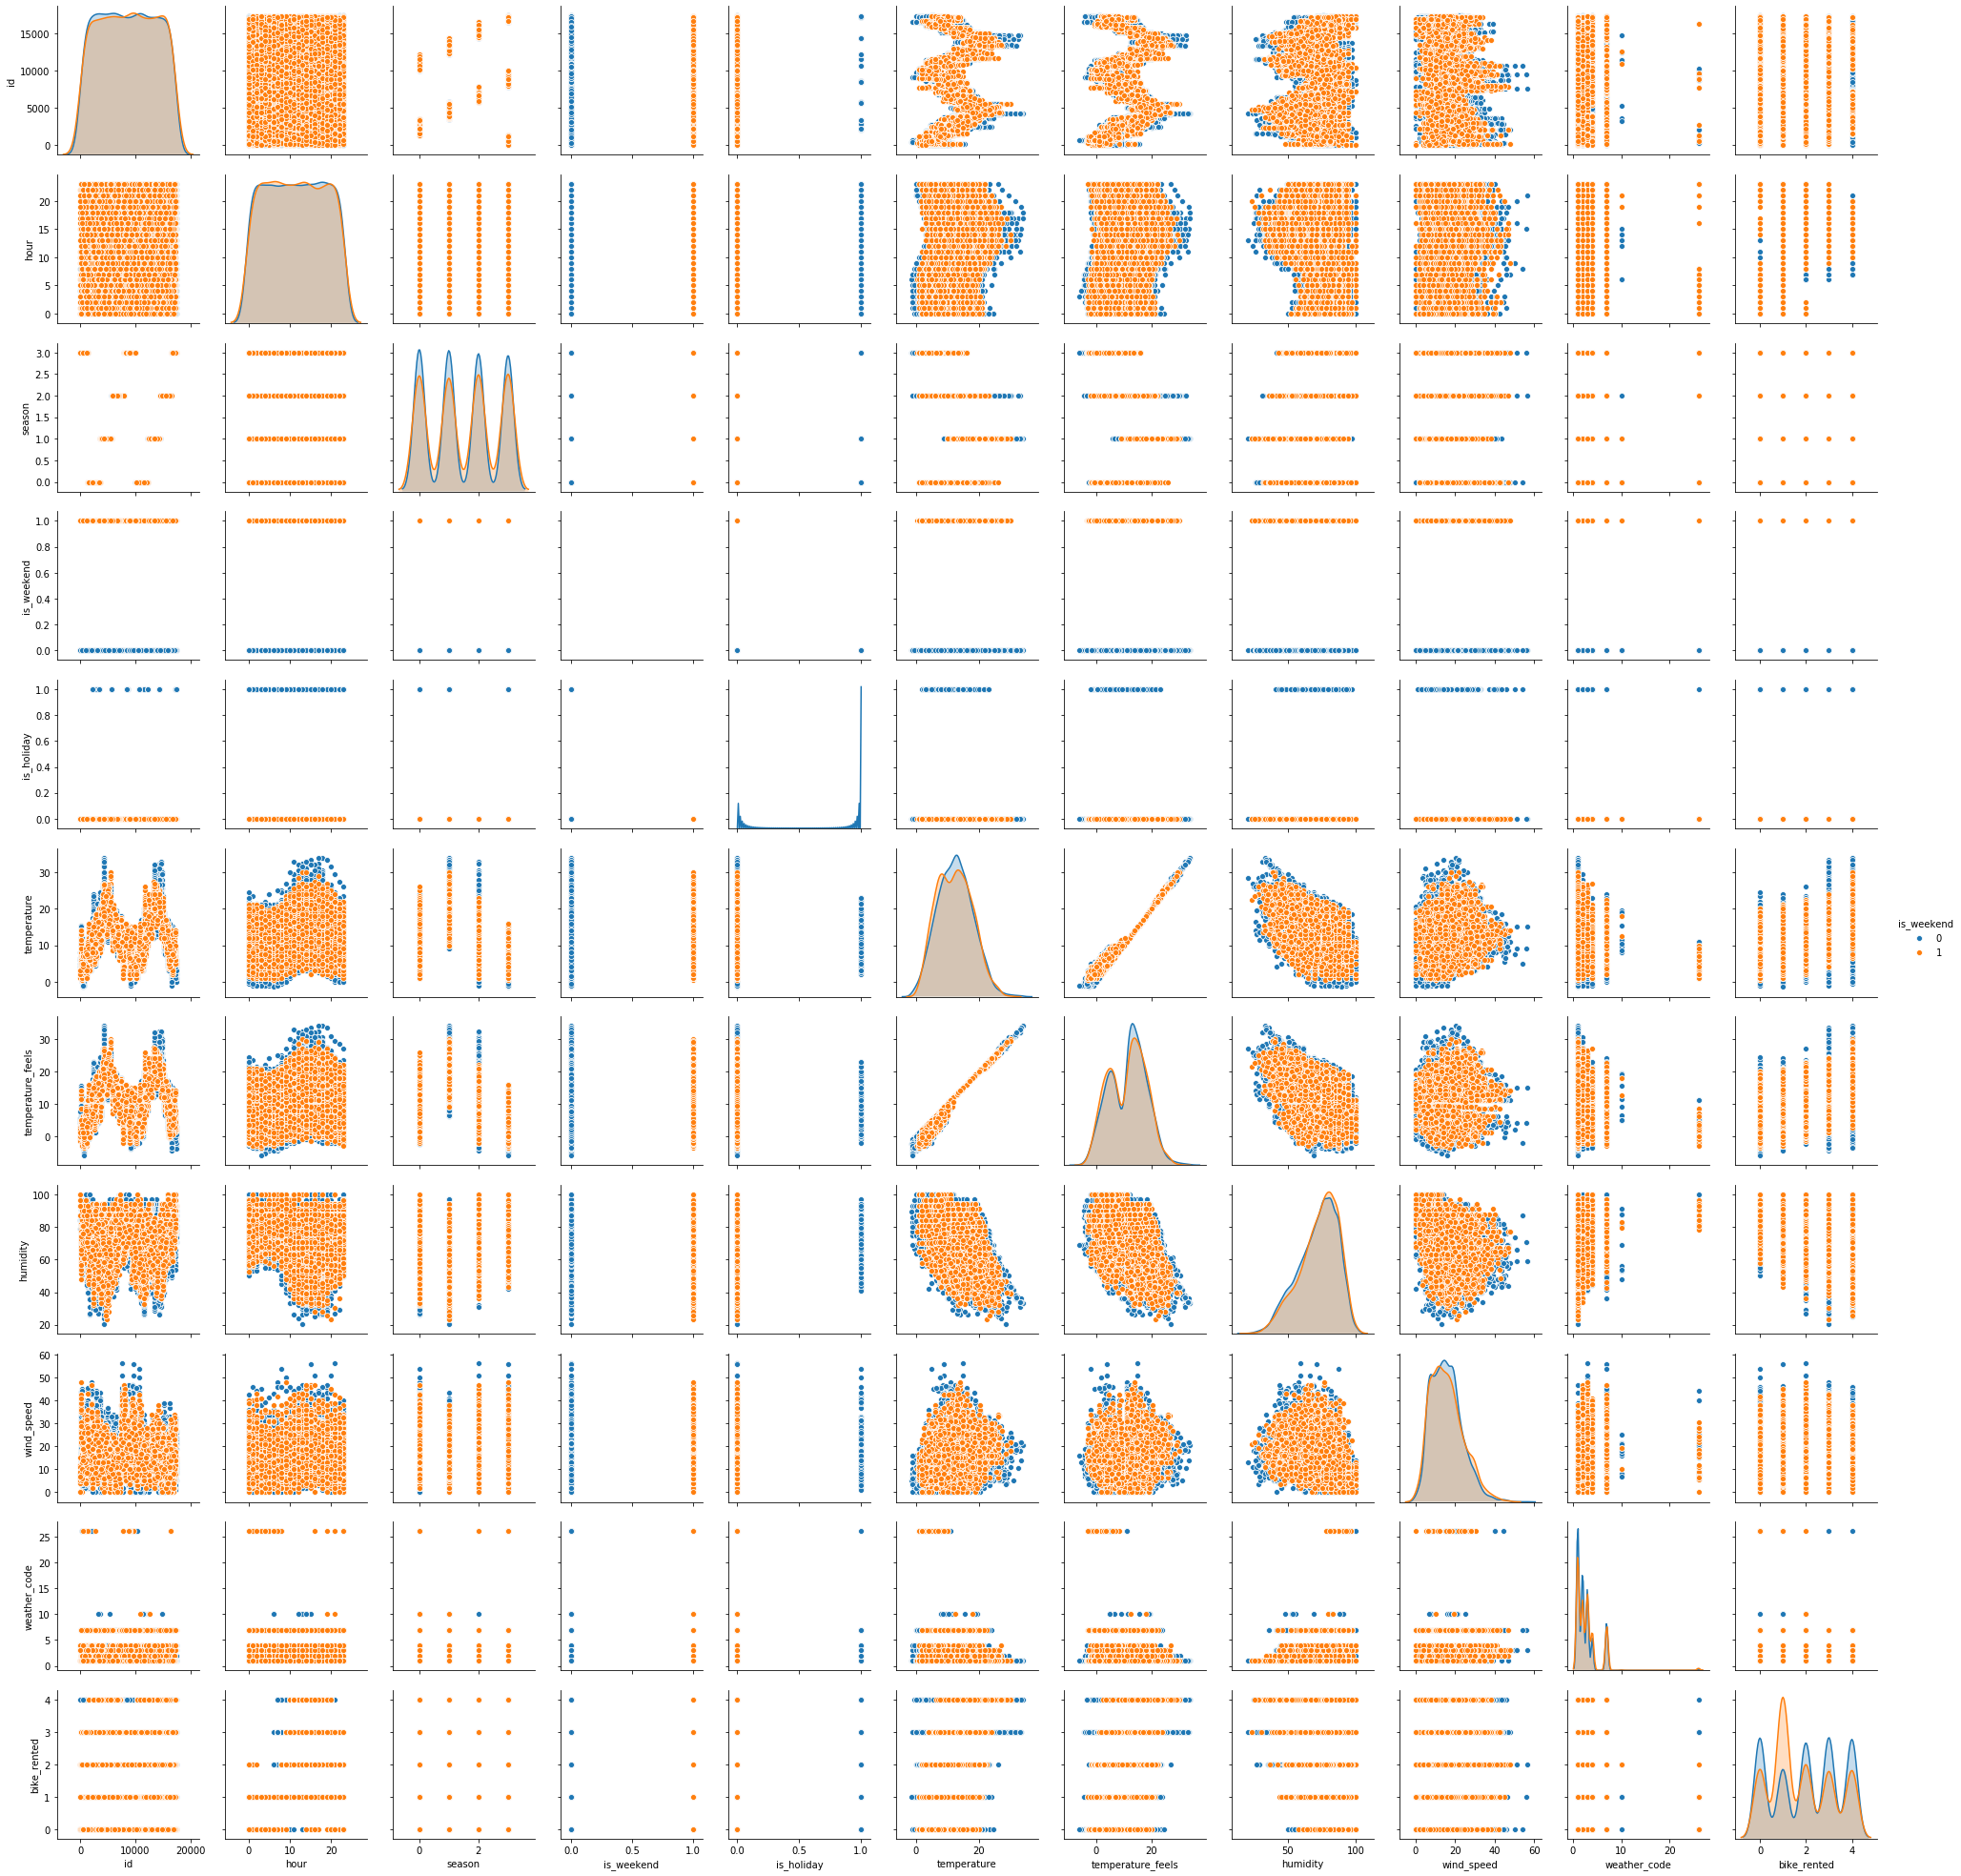

In [22]:
sns.pairplot(df, hue='is_weekend')

### Model Training

In [24]:
df.columns

Index(['id', 'date', 'hour', 'season', 'is_weekend', 'is_holiday',
       'temperature', 'temperature_feels', 'humidity', 'wind_speed',
       'weather_code', 'bike_rented'],
      dtype='object')

Since *bike_rented* is categorical, *date* is historical information, and *id* is an identifier, we can not use them for predictions. So, we shall drop them.

In [26]:
# Splitting the dataset
X = df.drop(['bike_rented', 'date', 'id'], axis=1)
y = df['bike_rented']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logclf = LogisticRegression()

In [32]:
logclf.fit(X,y)

C:\Users\amanr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\amanr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions = logclf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.86      0.68       781
           1       0.35      0.33      0.34       784
           2       0.39      0.35      0.37       794
           3       0.37      0.23      0.28       800
           4       0.46      0.49      0.48       759

    accuracy                           0.45      3918
   macro avg       0.43      0.45      0.43      3918
weighted avg       0.43      0.45      0.43      3918

